# **E-commerce Consumer Behavior Analysis: Insights and Strategies**  

---


**Objective:** Analyze consumer behavior in e-commerce using a Kaggle dataset to uncover trends and optimize business strategies.  

**Key Insights:**  
* **Peak shopping days:** Tuesday is the most active day, with a noticeable drop in activity on weekends (Saturday and Sunday).  
* **Top-spending customers and regions:** Andhra Pradesh and Gujarat lead in order volumes, with specific customers showing significantly higher spending patterns.  
* **Preferred payment methods:** Credit cards and UPI are the most popular, with higher average order values compared to other methods.  
* **Cross-selling opportunities:** Furniture & Decor, Bed, Bath & Table, and Health & Beauty are among the top product combinations frequently purchased together.  

**Recommendations:**  
* **Optimize marketing campaigns:** Focus on peak shopping days (Tuesday and Wednesday) and high-order regions (e.g., Andhra Pradesh and Gujarat).  
* **Promote preferred payment methods:** Offer discounts, installment services, and partnerships with banks to encourage the use of credit cards and UPI.  
* **Enhance customer experience on less active days:** Implement special promotions and improve the shopping experience on weekends to boost sales.  
* **Leverage cross-selling opportunities:** Create promotional bundles and improve product recommendation algorithms based on common product combinations.  
* **Analyze low-performing regions and months:** Investigate the reasons behind low sales in certain regions (e.g., low-order areas) and months (e.g., September) to develop targeted strategies.  

**Tools Used:**  
* Python for data analysis.  
* Pandas for data cleaning and manipulation.  
* Matplotlib for data visualization.  

**Outcome:**  
* Data-driven strategies to boost sales and enhance customer satisfaction.  
* Actionable insights for e-commerce businesses to optimize operations, improve marketing effectiveness, and increase customer retention.

# **Importing the DATASET and LIBRARIES**

In [53]:
import kagglehub
path = kagglehub.dataset_download("bashiralam1709/e-commerce-project-marketing-analytics")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1


In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#**Gathering Data**

In [55]:
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/CUSTOMERS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDER_REVIEW_RATINGS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/SELLERS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDER_PAYMENTS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/PRODUCTS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDERS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDER_ITEMS.csv
/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/GEO_LOCATION.csv


In [56]:
customers = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/CUSTOMERS.csv')
order_review_ratings = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDER_REVIEW_RATINGS.csv')
sellers = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/SELLERS.csv')
order_payments = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDER_PAYMENTS.csv')
products = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/PRODUCTS.csv')
orders = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDERS.csv')
order_items = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/ORDER_ITEMS.csv')
geo_location = pd.read_csv('/root/.cache/kagglehub/datasets/bashiralam1709/e-commerce-project-marketing-analytics/versions/1/GEO_LOCATION.csv')

#**EDA Process**
**EDA** involves exploring and summarizing datasets to understand their structure, identify patterns, detect anomalies, and generate insights using statistical and visual methods before applying advanced analysis.

In [57]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [58]:
#To get unique data in every column
customers.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,20


In [59]:
#Checking if there is NaN
print(customers.isna().any(axis=1).sum())

0


In [60]:
order_review_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [61]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [62]:
#I had noticed that there's 57 NaN values -by getting the subtraction between seller_id count and seller_city count- so to delete them
sellers.dropna(inplace=True)

In [63]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3038 non-null   object
 1   seller_zip_code_prefix  3038 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 118.7+ KB


In [64]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [65]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [66]:
products.dropna(inplace=True)

In [67]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32327 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32327 non-null  object 
 1   product_category_name       32327 non-null  object 
 2   product_name_lenght         32327 non-null  float64
 3   product_description_lenght  32327 non-null  float64
 4   product_photos_qty          32327 non-null  float64
 5   product_weight_g            32327 non-null  float64
 6   product_length_cm           32327 non-null  float64
 7   product_height_cm           32327 non-null  float64
 8   product_width_cm            32327 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [68]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [69]:
#Calculate the count of NaN values in each column of the Orders DataFrame
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Missing values in time-related columns (e.g., delivery dates) may have analytical significance (e.g., orders in transit or canceled).</br>
Therefore, we decided to retain them without deletion or imputation to avoid losing information or introducing bias in the analysis.</br>
They will be handled later in the analysis (e.g., by creating an "Unknown" category or analyzing them separately).

In [70]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [71]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [72]:
merged_data =(orders.merge(customers, on='customer_id', how='left')
                    .merge(order_items, on='order_id', how='left')
                    .merge(order_payments, on='order_id', how='left')
                    .merge(order_review_ratings, on='order_id', how='left')
                    .merge(sellers, on='seller_id', how='left')
                    .merge(products, on='product_id', how='left')
                    .merge(geo_location, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
)

print(merged_data)

                                order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
119146  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
119147  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
119148  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119149  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119150  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp order_approved_at 

In [73]:
print("\n".join(merged_data.columns))

order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
payment_sequential
payment_type
payment_installments
payment_value
review_id
review_score
review_creation_date
review_answer_timestamp
seller_zip_code_prefix
seller_city
seller_state
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
geolocation_zip_code_prefix
geolocation_lat
geolocation_lng
geolocation_city
geolocation_state


# **Key Metrics Summary**
This section provides a comprehensive overview of key metrics related to sales, products, users, and delivery, offering insights into revenue, order quantities, customer and seller counts, and more.

In [74]:
# Sales Stats
total_revenue = merged_data['payment_value'].sum()
average_revenue_per_order = merged_data['payment_value'].mean()
count_orders = merged_data['order_id'].nunique()
# Products Stats
total_quantity = merged_data['order_item_id'].sum()
average_quantity_per_order = merged_data['order_item_id'].mean()
count_categories = merged_data['product_category_name'].nunique()
count_products = merged_data['product_id'].nunique()
# Users Stats
count_customers = merged_data['customer_unique_id'].nunique()
count_sellers = merged_data['seller_id'].nunique()
average_product_rate = merged_data['review_score'].mean()
# Delivery Stats
count_city_locations = merged_data['customer_city'].nunique()
count_payment_methods = merged_data['payment_type'].nunique()

print('Sales Stats:')
print('Total Revenue:', '{:.2f}'.format(total_revenue))
print('Average Revenue Per Order: ', '{:.2f}'.format(average_revenue_per_order))
print('Total Orders:', count_orders)
print('Products Stats:')
print('Total Quantity:', total_quantity)
print('Average Quantity Per Order: ', '{:.2f}'.format(average_quantity_per_order))
print('Count of Categories:', count_categories)
print('Total Products:', count_products)
print('Users Stats:')
print('Count of Customers: ', count_customers)
print('Count of Sellers: ', count_sellers)
print('Average Product Rate: ', '{:.2f}'.format(average_product_rate))
print('Other Stats:')
print('Count of City Locations: ', count_city_locations)
print('Count of Payment Methods: ', count_payment_methods)

Sales Stats:
Total Revenue: 20581109.62
Average Revenue Per Order:  172.74
Total Orders: 99441
Products Stats:
Total Quantity: 141571.0
Average Quantity Per Order:  1.20
Count of Categories: 71
Total Products: 32951
Users Stats:
Count of Customers:  96096
Count of Sellers:  3095
Average Product Rate:  4.00
Other Stats:
Count of City Locations:  4119
Count of Payment Methods:  5


# **Purchase Patterns & Customer Behavior**
Understanding how, when, and where customers make purchases helps identify trends and optimize marketing strategies.

**1- What are the common purchasing patterns? (e.g., Which days of the week or months have the highest sales?)**

Count of Orders By Day:
day_of_week
Monday       19366
Tuesday      19316
Wednesday    18641
Thursday     17827
Friday       17006
Saturday     12899
Sunday       14096
Name: count, dtype: int64

 Count of Orders By Month:
month
January       9690
February     10183
March        11858
April        11156
May          12743
June         11256
July         12325
August       12802
September     5210
October       6089
November      9191
December      6648
Name: count, dtype: int64


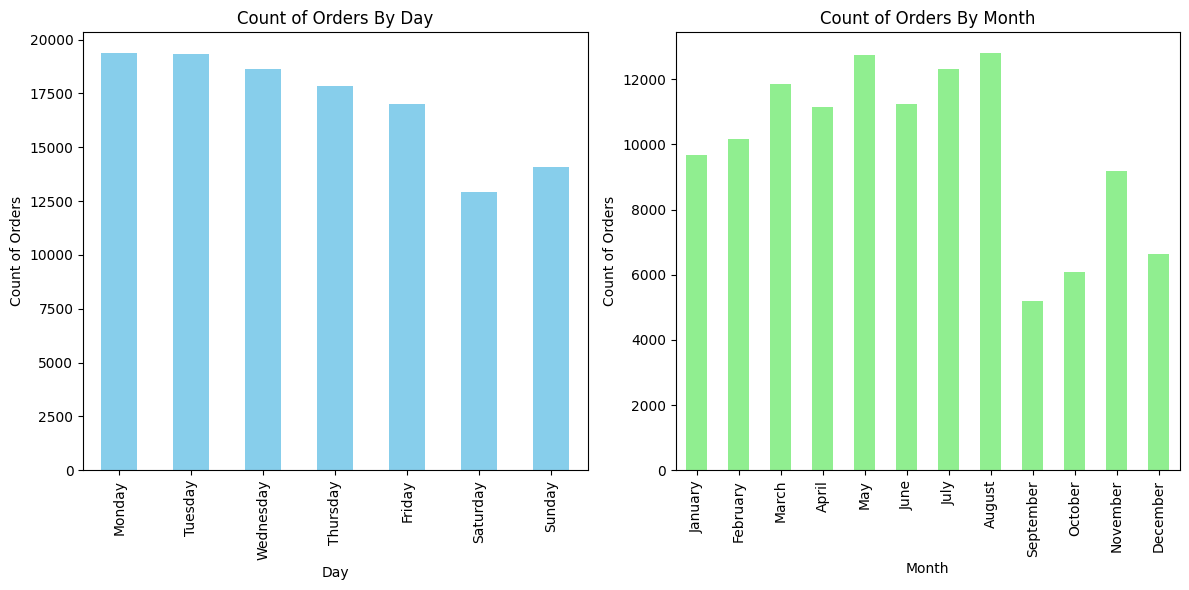

In [75]:
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

merged_data['day_of_week'] = merged_data['order_purchase_timestamp'].dt.day_name()
merged_data['month'] = merged_data['order_purchase_timestamp'].dt.month_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

merged_data['day_of_week'] = pd.Categorical(merged_data['day_of_week'], categories=day_order, ordered=True)
merged_data['month'] = pd.Categorical(merged_data['month'], categories=month_order, ordered=True)

orders_by_day = merged_data['day_of_week'].value_counts().sort_index()

orders_by_month = merged_data['month'].value_counts().sort_index()

print("Count of Orders By Day:")
print(orders_by_day)

print("\n Count of Orders By Month:")
print(orders_by_month)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
orders_by_day.plot(kind='bar', color='skyblue')
plt.title('Count of Orders By Day')
plt.xlabel('Day')
plt.ylabel('Count of Orders')

plt.subplot(1, 2, 2)
orders_by_month.plot(kind='bar', color='lightgreen')
plt.title('Count of Orders By Month')
plt.xlabel('Month')
plt.ylabel('Count of Orders')

plt.tight_layout()
plt.show()

***Analytical Report***

**1. Analysis of Orders by Day:** </br>
* Tuesday is the most active day for purchases (19,316 orders), followed
by Wednesday (18,641 orders). </br>
* Saturday is the least active day (12,899 orders), indicating that in usual customers begin ordering from the first day in the week (Monday by 19,366 orders) but they may prefer shopping mid-week rather than on weekends, so we can notice how does it reduce day by day till the Friday (17,006) </br>

**2. Analysis of Orders by Month:**
* August (12,802 orders) is the most active month for purchases, followed
by May and July.
* September (5,210 orders) is the least active month, which may indicate a drop in demand at the beginning of autumn.
* There is a noticeable increase in orders during the summer months (May to August).

**3. Conclusions and Recommendations:**
* Optimize Marketing Campaigns:
  * Focus on the most active days (Tuesday and Wednesday) to boost sales.
  * Offer special promotions on less active days (Saturday and Sunday) to stimulate purchases.
* Prepare for Peak Periods:
  * Enhance inventory and logistics during the summer months (May to August) to handle increased demand.
  * Plan strong marketing campaigns during this period.
* Analyze Reasons for Decline:
  * Investigate the reasons for the drop in sales in September and October and propose strategies to improve performance during these months.
* Improve Customer Experience:
  * Analyze the reasons for lower sales on weekends (Saturday and Sunday) and enhance the shopping experience during these days.
  * Make offers in the weekends to increase sales in these days.

**2- Who are the top-spending customers? Which geographic regions do most orders come from?**

In [76]:
top_customers = merged_data.groupby('customer_unique_id')['payment_value'].sum().reset_index()
top_customers = top_customers.sort_values(by='payment_value', ascending=False)
top_10_customers = top_customers.head(10)
top_regions = merged_data.groupby('geolocation_state').size().reset_index(name='order_count')
top_regions = top_regions.sort_values(by='order_count', ascending=False)
top_10_regions = top_regions.head(10)

top_10_customers = top_10_customers.reset_index(drop=False)
top_10_customers.index = top_10_customers.index + 1
top_10_customers = top_10_customers.rename(columns={'index': 'Row Number'})

top_10_regions = top_10_regions.reset_index(drop=False)
top_10_regions.index = top_10_regions.index + 1
top_10_regions = top_10_regions.rename(columns={'index': 'Row Number'})

top_10_customers = top_10_customers.drop(columns=['Row Number'])

top_10_regions = top_10_regions.drop(columns=['Row Number'])

print("Top 10 Spending Customers:")
print(top_10_customers)

print("\nTop 10 Regions with Most Orders:")
print(top_10_regions)

Top 10 Spending Customers:
                  customer_unique_id  payment_value
1   0a0a92112bd4c708ca5fde585afaa872      109312.64
2   698e1cf81d01a3d389d96145f7fa6df8       45256.00
3   c402f431464c72e27330a67f7b94d4fb       44048.00
4   4007669dec559734d6f53e029e360987       36489.24
5   ef8d54b3797ea4db1d63f0ced6a906e9       30186.00
6   763c8b1c9c68a0229c42c9fc6f662b93       29099.52
7   c8460e4251689ba205045f3ea17884a1       27935.46
8   eae0a83d752b1dd32697e0e7b4221656       25051.89
9   3d47f4368ccc8e1bb4c4a12dbda7111b       22346.60
10  adfa1cab2b2c8706db21bb13c0a1beb1       19457.04

Top 10 Regions with Most Orders:
   geolocation_state  order_count
1     Andhra Pradesh        75649
2            Gujarat         8445
3       Chhattisgarh         7094
4          Karnataka         4346
5              Delhi         3826
6     Madhya Pradesh         3221
7            Haryana         2534
8         Tamil Nadu         2285
9        Maharashtra         2242
10   Jammu & Kashmir       

***Analytical Report: Top-Spending Customers & Highest-Order Regions***

**Recommendations:**

* Analyze Reasons for High Spending:
  * Understand why top customers spend more (e.g., purchasing high-value products or frequent buying or just buying for wasting money).
* Enhance Marketing in High-Order Regions:
  * Increase marketing campaigns in regions with high order volumes, such as Andhra Pradesh and Gujarat.
* Loyalty Programs for Top-Spending Customers:
  * Offer exclusive discounts or loyalty programs to retain top-spending customers.
* Improve Services in Low-Order Regions:
  * Enhance marketing or services in regions with low order volumes to increase sales.

**3- What are the most common payment methods? Is there a relationship between payment method and order value?**

payment_type
credit_card    87784
UPI            23190
voucher         6465
debit_card      1706
not_defined        3
Name: count, dtype: int64


payment_type
UPI            177.271270
credit_card    179.724052
debit_card     150.864531
not_defined      0.000000
voucher         67.427353
Name: payment_value, dtype: float64


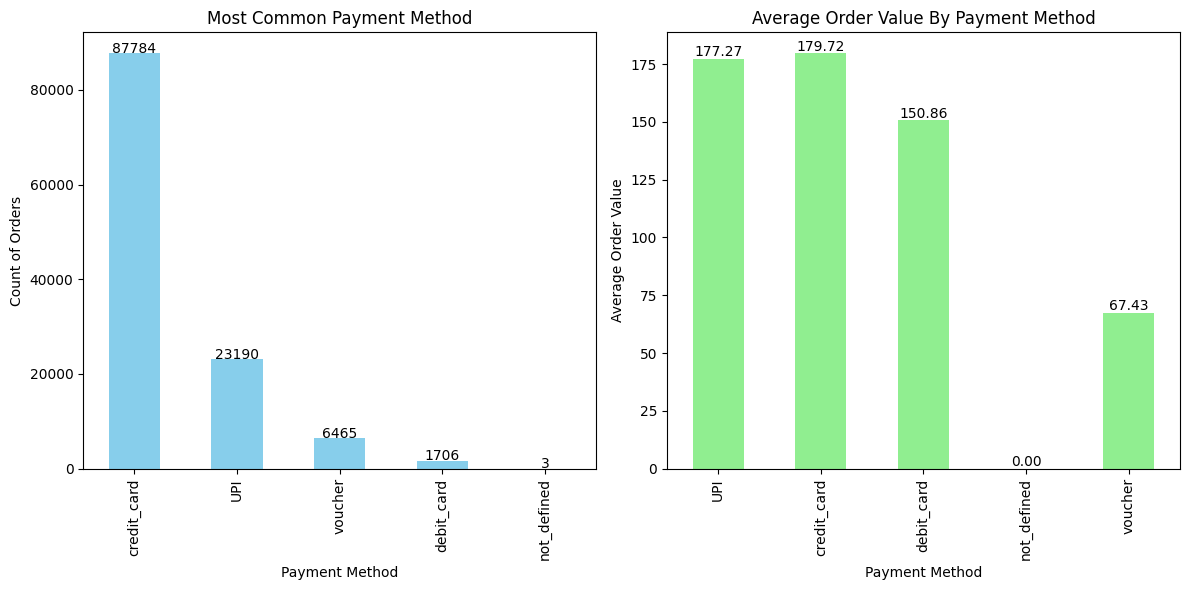

In [79]:
common_payment_methods = merged_data['payment_type'].value_counts()
payment_method_order_value = merged_data.groupby('payment_type')['payment_value'].mean()

print(common_payment_methods)
print("\n")
print(payment_method_order_value)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = common_payment_methods.plot(kind='bar', color='skyblue')
plt.title('Most Common Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count of Orders')
for i, value in enumerate(common_payment_methods):
    ax.text(i, value + 50, str(value), ha='center')

plt.subplot(1, 2, 2)
ax = payment_method_order_value.plot(kind='bar', color='lightgreen')
plt.title('Average Order Value By Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Order Value')
for i, value in enumerate(payment_method_order_value):
    ax.text(i, value + 1, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

***Analytical Report: Payment Methods and Order Values***

**1. Analytical Insight For The Most Common Payment Methods:**

* Credit cards are the preferred method for customers, indicating their trust in this payment method, and it might mean that they're tended to favor installment services.
* UPI is also highly popular, and it might be because of it's benefits in grouping all bank accounts in one application so making paying with it easier for customers.
* Voucher and Debit Card are less commonly used and may require incentives to encourage their use (e.g., special offers).
* Not Defined cases are rare and may need data review to understand why the payment method was not specified.

**2. Average Order Value by Payment Method:**

* UPI and Credit Card are associated with higher order values, indicating that customers using these methods tend to spend more and it might be related to leaning toward installments services.
* Debit Card has a lower average order value, suggesting that customers using this method tend to spend less, and may be it's related to the idea of limited balance.
* Voucher has the lowest average order value, likely used for smaller orders or promotional offers.
* Not Defined contributes no value, emphasizing the need to review these cases.

**3. Recommendations:**
* Promote Credit Card and UPI Usage:
  * Offer special discounts or rewards for customers using these methods to increase order values.
  * Offer installment services so it can encourage more users to buy more -as users whose don't own credit cards-.
  * Partnering with a bank to provide credit cards with issuance facilities to increase the number of credit card users for the e-commerce, reduce collection fees from credit cards from other banks, in addition to the possibility of adding discounts and ensuring user loyalty.
  
* Encourage Debit Card and Voucher Usage:
  * Provide promotions to incentivize customers to use these methods and increase order values.
  * Encourage content creators to promote the e-commerce and give them a percentage of the purchases made, for example, if there is a product worth $10 with the possibility of adding a 20% discount on the product, a 15% discount code is given to the content creator to promote the e-commerce and give him 5% of the product value, which encourages an increase in the number of users in general and voucher users in particular.

* Review Not Defined Cases:
  * Analyze these rare cases to understand why the payment method was not specified and address the issue.

In [78]:
product_name = pd.merge(order_items, products, on='product_id', how='inner')
order_groups = product_name.groupby('order_id')['product_category_name'].apply(list)
product_combinations = Counter()
for order_products in order_groups:
    combinations_list = list(combinations(order_products, 2))
    product_combinations.update(combinations_list)
top_10_cross_selling = product_combinations.most_common(10)
print('Top 10 Cross-Selling Product Combinations:')
print('')
for combination, count in top_10_cross_selling:
    product_1, product_2 = combination
    print(f'{product_1} and {product_2}: {count} occurrences')

Top 10 Cross-Selling Product Combinations:

Furniture_Decor and Furniture_Decor: 3033 occurrences
Bed_Bath_Table and Bed_Bath_Table: 2370 occurrences
Housewares and Housewares: 2002 occurrences
Computers_Accessories and Computers_Accessories: 1985 occurrences
Garden_Tools and Garden_Tools: 1448 occurrences
Health_Beauty and Health_Beauty: 1353 occurrences
Sports_Leisure and Sports_Leisure: 1238 occurrences
Office_Furniture and Office_Furniture: 825 occurrences
Auto and Auto: 625 occurrences
Telephony and Telephony: 593 occurrences


***Analytical Report: Top 10 Cross-Selling Product Combinations***

**Key Findings:**
* **Furniture & Decor:** Most common combination *(3033 occurrences)*. Customers buying furniture often purchase decor items.
* **Bed, Bath & Table:** Second most common *(2370 occurrences)*. Customers buying bath items also purchase tables.
* **Housewares:** Frequent purchases within the same category *(2002 occurrences)*.
* **Computers & Accessories:** Customers buying computers often add accessories *(1985 occurrences)*.
* **Garden Tools:** Customers buying garden tools tend to purchase additional garden items *(1448 occurrences)*.
* **Health & Beauty:** High cross-selling within the same category *(1353 occurrences)*.
* **Sports & Leisure:** Customers buying sports/leisure products often buy more from the same category *(1238 occurrences)*.
* **Office Furniture:** Frequent purchases within the same category *(825 occurrences)*.
* **Auto:** Customers buying auto products often purchase additional auto items *(625 occurrences)*.
* **Telephony:** High cross-selling within telephony products *(593 occurrences)*.

**Recommendations:**
* **Create Promotional Bundles:** Use the most common combinations to create promotional offers that bundle complementary products.
* **Improve Product Recommendations:** Leverage the data to enhance recommendation algorithms on the website.
* **Enhance Customer Experience:** Improve the shopping experience by displaying complementary products together on product pages.
* **Deeper Analysis:** Conduct further analysis to understand the reasons behind these combinations and how to optimize them.